A última raspagem foi feira dia 06/11.

#### Importações

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Leitura da base criado a partir do webscraping

In [66]:
df = pd.read_excel('civitatis.xlsx')

#### Tratar valores ausentes para colunas categóricas

In [67]:
df['avaliacao'].fillna("Sem Avaliação", inplace=True)
df['categoria'].fillna("Sem Categoria", inplace=True)
df['preco'].fillna("Preço não disponível", inplace=True)
df['duracao'].fillna("Duração não informada", inplace=True)

C:\Users\gabrielioliveira-ieg\AppData\Local\Temp\ipykernel_20584\395821283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avaliacao'].fillna("Sem Avaliação", inplace=True)
C:\Users\gabrielioliveira-ieg\AppData\Local\Temp\ipykernel_20584\395821283.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

#### Funçoes para conversão de dados

In [68]:
def convert_rating(rating):
    if isinstance(rating, str) and "/" in rating:
        try:
            # Pega apenas a parte antes do "/"
            return float(rating.split('/')[0].replace(',', '.'))
        except ValueError:
            return None
    return None


def convert_duration(duration):
    if isinstance(duration, str) and duration != "Duração não informada":
        try:
            # Separar as durações e calcular a média em minutos
            durations = duration.split(' - ')
            total_minutes = []
            for dur in durations:
                hours, minutes = 0, 0
                if 'h' in dur:
                    hours = int(dur.split('h')[0])
                    dur = dur.split('h')[1]
                if 'm' in dur:
                    minutes = int(dur.split('m')[0].strip())
                total_minutes.append(hours * 60 + minutes)
            return sum(total_minutes) / len(total_minutes)
        except ValueError:
            return None  # Ignora valores que não podem ser convertidos
    return None


def convert_price(price):
    if isinstance(price, str):
        if price == "Preço não disponível" or price == "Grátis!":
            return 0  # Definir como 0 para preços gratuitos/não disponíveis
        try:
            return float(price.replace('R$', '').replace(',', '.').strip())
        except ValueError:
            return None  # Retorna None para valores que não podem ser convertidos
    return None


In [69]:
df['avaliacao'] = df['avaliacao'].apply(convert_rating)
df['duracao'] = df['duracao'].apply(convert_duration)
df['preco'] = df['preco'].apply(convert_price)


In [70]:
# Verificar as conversões
print(df[['avaliacao', 'duracao', 'preco']].head())

   avaliacao  duracao  preco
0        8.8    480.0  603.4
1        8.8    360.0  491.0
2        9.3    187.5  220.0
3        9.2    180.0    0.0
4        7.8    795.0  339.2


#### Gráficos para análise

In [71]:
color1 = "#996FFF"
color2 = "#72E0D6"

##### Distribuição de Avaliações

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['avaliacao'].dropna(), color=color1)
plt.title("Distribuição de Avaliações")
plt.xlabel("Avaliação")
plt.ylabel("Frequência")
plt.show()

A maioria das avaliações está concentrada nas faixas mais altas, entre 9 e 10, indicando que os serviços ou produtos oferecidos têm uma boa aceitação entre os usuários.
A distribuição é ligeiramente assimétrica à esquerda, com poucas avaliações abaixo de 7, sugerindo uma percepção majoritariamente positiva.
Esse padrão pode refletir a qualidade ou popularidade dos serviços avaliados, com avaliações baixas sendo raras.

##### Distribuição de Duração

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['duracao'].dropna(), color=color2)
plt.title("Distribuição de Duração (em minutos)", fontsize=14)
plt.xlabel("Duração (min)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()

A duração dos serviços e atividades está concentrada entre 150 e 300 minutos, ou seja, entre 2,5 e 5 horas, o que é típico para atividades turísticas e excursões de um dia.
Existem algumas atividades mais longas, mas a frequência cai drasticamente após 600 minutos (10 horas), indicando que a maioria das atividades é planejada para um período de tempo razoável e acessível para os turistas.
A variabilidade nas durações sugere que há uma boa diversidade de atividades, desde opções curtas até excursões mais extensas.

##### Distribuição de Preço

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['preco'].dropna(), color=color1)
plt.title("Distribuição de Preços", fontsize=14)
plt.xlabel("Preço (R$)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()

A maioria dos preços está concentrada nas faixas mais baixas, indicando que muitas das atividades e serviços estão disponíveis a preços acessíveis.
Há um pequeno número de atividades com preços elevados (acima de R$2000), possivelmente atividades mais exclusivas ou pacotes premium.
Essa distribuição pode sugerir que o público-alvo é diversificado, com opções de baixo custo para a maioria dos usuários e algumas opções de luxo para um público mais específico.

##### Distribuição de Locais

C:\Users\gabrielioliveira-ieg\AppData\Local\Temp\ipykernel_20584\3336786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='local', order=df['local'].value_counts().index, palette=[color1, color2])
C:\Users\gabrielioliveira-ieg\AppData\Local\Temp\ipykernel_20584\3336786.py:2: UserWarning: 
The palette list has fewer values (2) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y='local', order=df['local'].value_counts().index, palette=[color1, color2])
findfont: Font family 'Levenim MT' not found.
findfont: Font family 'Levenim MT' not found.
findfont: Font family 'Levenim MT' not found.
findfont: Font family 'Levenim MT' not found.
findfont: Font family 'Levenim MT' not found.
findfont: Font family 'Levenim MT' not found.
findfont: Font family 'Levenim MT' not found.
findfo

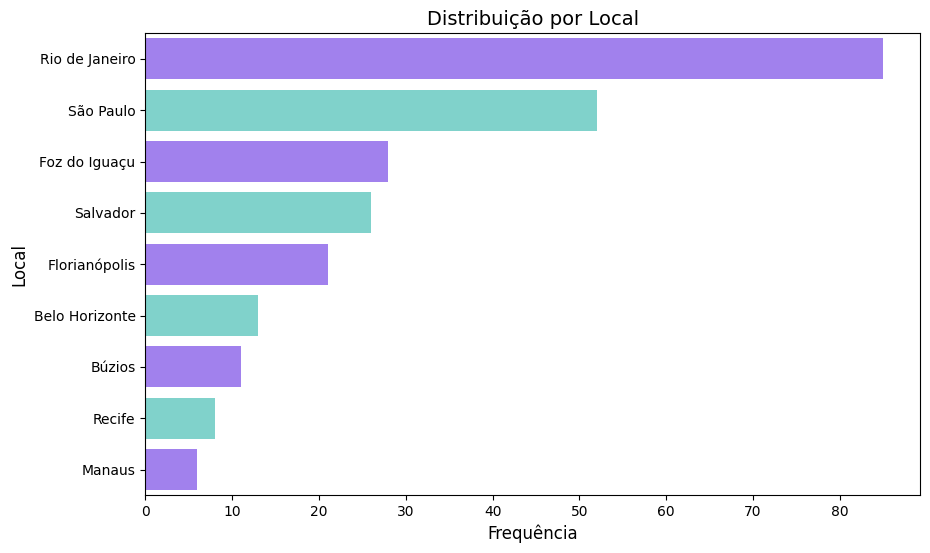

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='local', order=df['local'].value_counts().index, palette=[color1, color2])
plt.title("Distribuição por Local", fontsize=14)
plt.xlabel("Frequência", fontsize=12)
plt.ylabel("Local", fontsize=12)
plt.show()

O gráfico de Distribuição por Local mostra que as atividades e serviços turísticos estão concentrados principalmente em destinos turísticos conhecidos, como Rio de Janeiro, São Paulo e Foz do Iguaçu. Esses locais oferecem uma variedade de atividades, possivelmente devido à popularidade e à infraestrutura turística bem desenvolvida. Possivelmente devido à popularidade destes locais em serem referências no mundo turístico.

##### Distribuição por Categoria

C:\Users\gabrielioliveira-ieg\AppData\Local\Temp\ipykernel_20584\120653819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='categoria', order=df['categoria'].value_counts().index, palette=[color1, color2])
C:\Users\gabrielioliveira-ieg\AppData\Local\Temp\ipykernel_20584\120653819.py:2: UserWarning: 
The palette list has fewer values (2) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y='categoria', order=df['categoria'].value_counts().index, palette=[color1, color2])
findfont: Font family 'Levenim MT' not found.
findfont: Font family 'Levenim MT' not found.
findfont: Font family 'Levenim MT' not found.
findfont: Font family 'Levenim MT' not found.
findfont: Font family 'Levenim MT' not found.
findfont: Font family 'Levenim MT' not found.
findfont: Font family 'Levenim 

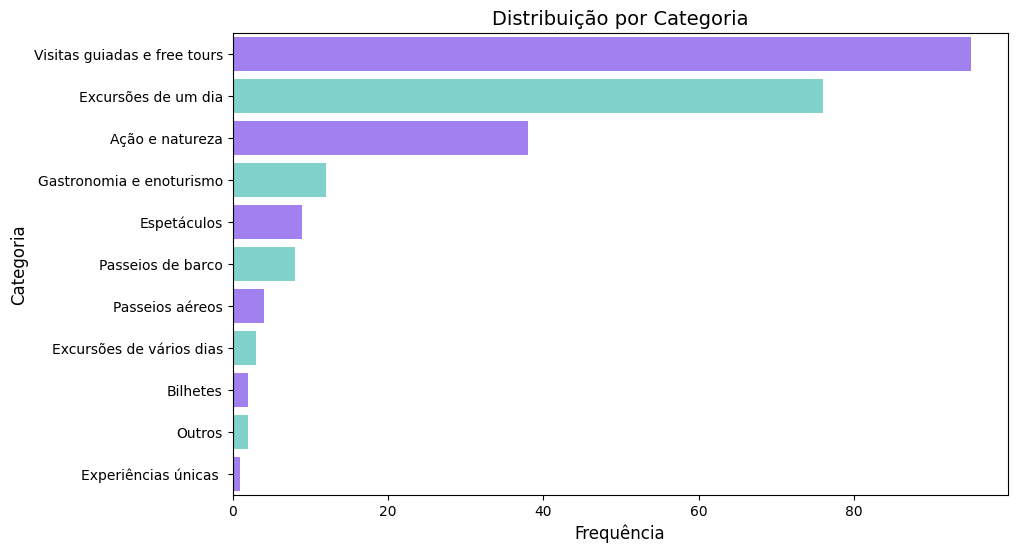

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='categoria', order=df['categoria'].value_counts().index, palette=[color1, color2])
plt.title("Distribuição por Categoria", fontsize=14)
plt.xlabel("Frequência", fontsize=12)
plt.ylabel("Categoria", fontsize=12)
plt.show()


As categorias mais populares são "Visitas guiadas e free tours" e "Excursões de um dia", o que revela uma alta demanda por atividades de curto prazo e de fácil acesso. Além dessas, outras categorias, como "Ação e natureza" e "Gastronomia e enoturismo", também mostram uma popularidade significativa, refletindo o interesse em experiências temáticas. Por outro lado, categorias como "Experiências únicas" são menos populares, o que pode indicar que são mais voltadas para um público específico ou representam atividades menos comuns no mercado.